In [1]:
import pandas as pd

C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## Импортируем датасет из world bank databank (https://databank.worldbank.org/source/global-financial-inclusion/Type/TABLE/preview/on) 

In [2]:
df_all = pd.read_csv('World development indicators.csv')
df_all.head()

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Kazakhstan,KAZ,"Population, total",SP.POP.TOTL,9319283,9639302,9959414,10277790,10590934,10897644,...,17288285,17542806,17794055,18037776,18276452,18513673,18755666,19191356,19634983,19900177
1,Kazakhstan,KAZ,Population growth (annual %),SP.POP.GROW,..,3.37630049543017,3.2669535162312,3.14670218463675,3.0013095765307,2.85482669470742,...,1.47267087305755,1.46148468519161,1.42204614032925,1.36038126908993,1.31452298457883,1.28960848954226,1.29863532544565,2.29640758923114,2.28528529025291,1.34158039345206
2,Kazakhstan,KAZ,Surface area (sq. km),AG.SRF.TOTL.K2,..,2724902,2724902,2724902,2724902,2724902,...,2724902,2724902,2724902,2724902,2724902,2724902,2724900,2724900,..,..
3,Kazakhstan,KAZ,Population density (people per sq. km of land ...,EN.POP.DNST,..,..,..,..,..,..,...,6.40378004963514,6.49805756195133,6.59112308775049,6.68140015557284,6.76980849724043,6.85767789013594,6.94731488683928,7.10869948512798,..,..
4,Kazakhstan,KAZ,Poverty headcount ratio at national poverty li...,SI.POV.NAHC,..,..,..,..,..,..,...,..,..,..,..,4.3,4.3,5.3,5.2,5.2,..


## Меняем размерность данных

In [3]:
def reshape_data(df):
    df_long = df.melt(
        id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
        var_name="Year",
        value_name="Value"
    )
    
    df_long["Year"] = df_long["Year"].str.extract(r'(\d{4})')
    
    df_pivot = df_long.pivot_table(
        index=["Country Name", "Country Code", "Year"],
        columns="Series Name",
        values="Value",
        aggfunc="first"
    ).reset_index()
    
    df_pivot.columns.name = None
    return df_pivot

df_all_reshaped = reshape_data(df_all)

In [4]:
df_all_reshaped

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),...,"Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
0,Afghanistan,AFG,1960,138.876,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Afghanistan,AFG,1961,138.717,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.23918482345135
2,Afghanistan,AFG,1962,138.494,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.32209917624658
3,Afghanistan,AFG,1963,138.173,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.36650792012084
4,Afghanistan,AFG,1964,140.107,..,..,..,..,..,..,...,..,..,..,..,652860,..,..,..,..,5.42708007382488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,2019,97.354,9.81926160524559,34.5535430097879,86,..,..,..,...,..,97.4766143857125,..,..,390760,..,27.2147472925701,27,30.1426934674569,1.99235149035129
17020,Zimbabwe,ZWE,2020,96.18,8.77285875573664,40.0463245921697,..,..,..,..,...,..,97.3841623798408,..,..,390760,..,27.2147472925701,..,18.6954515188142,2.13042091541727
17021,Zimbabwe,ZWE,2021,94.312,8.84989924799123,40.0463245921697,..,..,..,..,...,..,96.0151477769296,..,..,390760,..,27.2147472925701,..,9.23289369767289,2.23472352659423
17022,Zimbabwe,ZWE,2022,92.566,7.19192216597415,..,..,..,..,..,...,..,95.789907037216,..,..,..,..,27.2147472925701,..,5.04388356801315,2.30843663497267


# Подготовим данные для модели 

## Заменяем ".." на NaN для чистки

In [5]:
import numpy as np

df_all_reshaped.replace('..', np.nan, inplace=True)

## Удаляем строки, в которых нет значения ВВП (наш таргет) 

In [6]:
df_all_reshaped = df_all_reshaped.dropna(subset=["GDP (current US$)"])

df_all_reshaped

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),...,"Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
40,Afghanistan,AFG,2000,152.572,NaN,43.0159066808059,12.4,5.3,NaN,NaN,...,NaN,22.1629905700684,NaN,NaN,652860,NaN,NaN,NaN,NaN,1.86137729962901
41,Afghanistan,AFG,2001,150.863,NaN,43.0159066808059,NaN,NaN,NaN,NaN,...,NaN,22.9085903167725,0,14.4715099334717,652860,NaN,NaN,NaN,NaN,1.15383861520503
42,Afghanistan,AFG,2002,148.141,38.6278918638443,43.0159066808059,NaN,NaN,NaN,NaN,...,NaN,75.9597473144531,NaN,NaN,652860,NaN,NaN,NaN,NaN,6.86345297807244
43,Afghanistan,AFG,2003,143.37,37.4188554431481,43.0159066808059,14.3,10.3,NaN,NaN,...,NaN,96.5536804199219,0.544260025024414,14.078049659729,652860,NaN,NaN,NaN,NaN,7.95344768841497
44,Afghanistan,AFG,2004,138.827,29.7210671376957,43.0159066808059,NaN,NaN,NaN,NaN,...,NaN,106.252662658691,0.40582001209259,19.2631397247314,652860,NaN,NaN,9.5,NaN,4.58865325754718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,2019,97.354,9.81926160524559,34.5535430097879,86,NaN,NaN,NaN,...,NaN,97.4766143857125,NaN,NaN,390760,NaN,27.2147472925701,27,30.1426934674569,1.99235149035129
17020,Zimbabwe,ZWE,2020,96.18,8.77285875573664,40.0463245921697,NaN,NaN,NaN,NaN,...,NaN,97.3841623798408,NaN,NaN,390760,NaN,27.2147472925701,NaN,18.6954515188142,2.13042091541727
17021,Zimbabwe,ZWE,2021,94.312,8.84989924799123,40.0463245921697,NaN,NaN,NaN,NaN,...,NaN,96.0151477769296,NaN,NaN,390760,NaN,27.2147472925701,NaN,9.23289369767289,2.23472352659423
17022,Zimbabwe,ZWE,2022,92.566,7.19192216597415,NaN,NaN,NaN,NaN,NaN,...,NaN,95.789907037216,NaN,NaN,NaN,NaN,27.2147472925701,NaN,5.04388356801315,2.30843663497267


Присваиваем численный тип данных для значений

In [7]:
df_all_reshaped = df_all_reshaped.apply(pd.to_numeric, errors='ignore')

C:\Users\user\AppData\Local\Temp\ipykernel_14312\4018284617.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_all_reshaped = df_all_reshaped.apply(pd.to_numeric, errors='ignore')


In [8]:
df_filtered = df_all_reshaped.copy()

In [9]:
df_filtered

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)",Births attended by skilled health staff (% of total),"Contraceptive prevalence, any method (% of married women ages 15-49)",Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),...,"Revenue, excluding grants (% of GDP)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Tax revenue (% of GDP),Terrestrial and marine protected areas (% of total territorial area),Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %)
40,Afghanistan,AFG,2000,152.572,NaN,43.015907,12.4,5.3,NaN,NaN,...,NaN,22.162991,NaN,NaN,652860.0,NaN,NaN,NaN,NaN,1.861377
41,Afghanistan,AFG,2001,150.863,NaN,43.015907,NaN,NaN,NaN,NaN,...,NaN,22.908590,0.00000,14.47151,652860.0,NaN,NaN,NaN,NaN,1.153839
42,Afghanistan,AFG,2002,148.141,38.627892,43.015907,NaN,NaN,NaN,NaN,...,NaN,75.959747,NaN,NaN,652860.0,NaN,NaN,NaN,NaN,6.863453
43,Afghanistan,AFG,2003,143.370,37.418855,43.015907,14.3,10.3,NaN,NaN,...,NaN,96.553680,0.54426,14.07805,652860.0,NaN,NaN,NaN,NaN,7.953448
44,Afghanistan,AFG,2004,138.827,29.721067,43.015907,NaN,NaN,NaN,NaN,...,NaN,106.252663,0.40582,19.26314,652860.0,NaN,NaN,9.5,NaN,4.588653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,Zimbabwe,ZWE,2019,97.354,9.819262,34.553543,86.0,NaN,NaN,NaN,...,NaN,97.476614,NaN,NaN,390760.0,NaN,27.214747,27.0,30.142693,1.992351
17020,Zimbabwe,ZWE,2020,96.180,8.772859,40.046325,NaN,NaN,NaN,NaN,...,NaN,97.384162,NaN,NaN,390760.0,NaN,27.214747,NaN,18.695452,2.130421
17021,Zimbabwe,ZWE,2021,94.312,8.849899,40.046325,NaN,NaN,NaN,NaN,...,NaN,96.015148,NaN,NaN,390760.0,NaN,27.214747,NaN,9.232894,2.234724
17022,Zimbabwe,ZWE,2022,92.566,7.191922,NaN,NaN,NaN,NaN,NaN,...,NaN,95.789907,NaN,NaN,NaN,NaN,27.214747,NaN,5.043884,2.308437


## Удаляем строки, в которых больше 50% пропущенных значений и далее - колонны, в которых более 50% пропущенных значений 

In [10]:
threshold_rows = int(0.5 * df_filtered.shape[1])  
threshold_columns = int(0.5 * df_filtered.shape[0])  

df_filtered_cleaned = df_filtered.dropna(thresh=threshold_rows).dropna(axis=1, thresh=threshold_columns)

df_filtered_cleaned

,Country Name,Country Code,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),...,"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Urban population growth (annual %)
40,Afghanistan,AFG,2000,152.572,NaN,NaN,7.534,1.700000e+05,12084.4,3.521418e+09,...,NaN,29.963329,1.443803,19542982,NaN,22.162991,NaN,NaN,652860.0,1.861377
41,Afghanistan,AFG,2001,150.863,NaN,NaN,7.446,6.800000e+05,12084.4,2.813572e+09,...,NaN,30.186640,0.742517,19688632,NaN,22.908590,0.00000,14.47151,652860.0,1.153839
42,Afghanistan,AFG,2002,148.141,38.627892,NaN,7.339,5.000000e+07,12084.4,3.825701e+09,...,NaN,32.197624,6.449321,21000256,NaN,75.959747,NaN,NaN,652860.0,6.863453
43,Afghanistan,AFG,2003,143.370,37.418855,NaN,7.220,5.780000e+07,12084.4,4.520947e+09,...,NaN,34.719547,7.541019,22645130,NaN,96.553680,0.54426,14.07805,652860.0,7.953448
44,Afghanistan,AFG,2004,138.827,29.721067,NaN,7.069,1.869000e+08,12084.4,5.224897e+09,...,NaN,36.112339,3.933178,23553551,NaN,106.252663,0.40582,19.26314,652860.0,4.588653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17018,Zimbabwe,ZWE,2018,98.507,7.319375,26.163973,3.659,7.178653e+08,175367.2,3.415607e+10,...,1.427703e+09,38.909614,2.020537,15052184,90.726250,97.879271,NaN,NaN,390760.0,1.933653
17019,Zimbabwe,ZWE,2019,97.354,9.819262,27.554156,3.599,2.495000e+08,174906.5,2.183223e+10,...,1.417012e+09,39.691374,1.989253,15354608,90.232155,97.476614,NaN,NaN,390760.0,1.992351
17020,Zimbabwe,ZWE,2020,96.180,8.772859,22.293063,3.545,1.503600e+08,174445.8,2.150970e+10,...,1.832039e+09,40.505793,2.031112,15669666,91.866905,97.384162,NaN,NaN,390760.0,2.130421
17021,Zimbabwe,ZWE,2021,94.312,8.849899,22.775241,3.491,2.500000e+08,173985.1,2.837124e+10,...,2.573627e+09,41.342960,2.045715,15993524,86.099625,96.015148,NaN,NaN,390760.0,2.234724


## Сделаем imputing, восполним оставшиеся NaN значения посредством поиска средних значений, группируя по странам

In [11]:
df_final = df_filtered_cleaned.copy().drop(['Country Code'], axis=1)

country_names = df_final['Country Name']

df_final_filled_for_mean = df_final.fillna(0)

columns_to_impute = df_final.columns.difference(['Country Name'])

df_final[columns_to_impute] = df_final_filled_for_mean.groupby('Country Name')[columns_to_impute].transform(lambda x: x.fillna(x.mean()))

df_final['Country Name'] = country_names

print(df_final.isna().sum())

df_final.head()

Country Name                                                                   0
Year                                                                           0
Adolescent fertility rate (births per 1,000 women ages 15-19)                  0
Agriculture, forestry, and fishing, value added (% of GDP)                     0
Exports of goods and services (% of GDP)                                       0
Fertility rate, total (births per woman)                                       0
Foreign direct investment, net inflows (BoP, current US$)                      0
Forest area (sq. km)                                                           0
GDP (current US$)                                                              0
GDP growth (annual %)                                                          0
GNI per capita, Atlas method (current US$)                                     0
GNI per capita, PPP (current international $)                                  0
GNI, Atlas method (current U

,Country Name,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),...,"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Urban population growth (annual %)
40,Afghanistan,2000,152.572,0.000000,0.0,7.534,170000.0,12084.4,3.521418e+09,0.000000,...,0.0,29.963329,1.443803,19542982,0.0,22.162991,0.00000,0.00000,652860.0,1.861377
41,Afghanistan,2001,150.863,0.000000,0.0,7.446,680000.0,12084.4,2.813572e+09,-9.431974,...,0.0,30.186640,0.742517,19688632,0.0,22.908590,0.00000,14.47151,652860.0,1.153839
42,Afghanistan,2002,148.141,38.627892,0.0,7.339,50000000.0,12084.4,3.825701e+09,28.600001,...,0.0,32.197624,6.449321,21000256,0.0,75.959747,0.00000,0.00000,652860.0,6.863453
43,Afghanistan,2003,143.370,37.418855,0.0,7.220,57800000.0,12084.4,4.520947e+09,8.832278,...,0.0,34.719547,7.541019,22645130,0.0,96.553680,0.54426,14.07805,652860.0,7.953448
44,Afghanistan,2004,138.827,29.721067,0.0,7.069,186900000.0,12084.4,5.224897e+09,1.414118,...,0.0,36.112339,3.933178,23553551,0.0,106.252663,0.40582,19.26314,652860.0,4.588653


## Удалим аутлаеры, сильно отличающиеся от средних значений ВВП (часть оценки статистической значимости)

C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


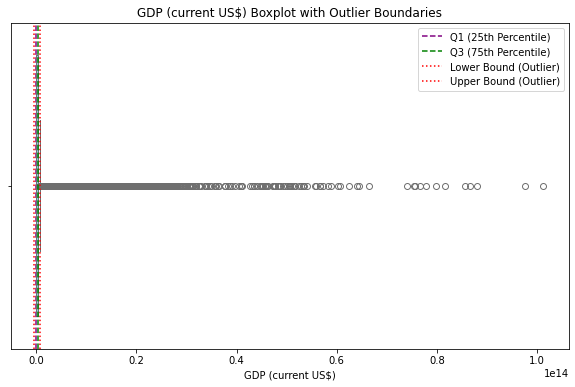

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = df_final['GDP (current US$)'].quantile(0.25)
Q3 = df_final['GDP (current US$)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_final['GDP (current US$)'], color='skyblue')

plt.axvline(Q1, color='purple', linestyle='--', label='Q1 (25th Percentile)')
plt.axvline(Q3, color='green', linestyle='--', label='Q3 (75th Percentile)')
plt.axvline(lower_bound, color='red', linestyle=':', label='Lower Bound (Outlier)')
plt.axvline(upper_bound, color='red', linestyle=':', label='Upper Bound (Outlier)')

plt.title("GDP (current US$) Boxplot with Outlier Boundaries")
plt.xlabel("GDP (current US$)")
plt.legend()

plt.show()


In [13]:
Q1 = df_final['GDP (current US$)'].quantile(0.25)
Q3 = df_final['GDP (current US$)'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_final[(df_final['GDP (current US$)'] >= lower_bound) & 
                          (df_final['GDP (current US$)'] <= upper_bound)]
df_no_outliers.shape

(9100, 36)

## Очистка датасета завершена, выбросы удалены, больше нет нулевых значений. Можно переходить к feature engineering (генерация признаков), поменяем навзания стран на численные значения используя target encoding  

In [14]:
df_final_encoded = df_no_outliers.copy()

country_gdp_mean = df_final_encoded.groupby('Country Name')['GDP (current US$)'].mean()

df_final_encoded['Country Name Encoded'] = df_final_encoded['Country Name'].map(country_gdp_mean)

df_final_encoded = df_final_encoded.drop('Country Name', axis=1)

print(df_final_encoded.isna().sum())

df_final_encoded.head()

Year                                                                           0
Adolescent fertility rate (births per 1,000 women ages 15-19)                  0
Agriculture, forestry, and fishing, value added (% of GDP)                     0
Exports of goods and services (% of GDP)                                       0
Fertility rate, total (births per woman)                                       0
Foreign direct investment, net inflows (BoP, current US$)                      0
Forest area (sq. km)                                                           0
GDP (current US$)                                                              0
GDP growth (annual %)                                                          0
GNI per capita, Atlas method (current US$)                                     0
GNI per capita, PPP (current international $)                                  0
GNI, Atlas method (current US$)                                                0
GNI, PPP (current internatio

,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)",...,Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Surface area (sq. km),Urban population growth (annual %),Country Name Encoded
40,2000,152.572,0.000000,0.0,7.534,170000.0,12084.4,3.521418e+09,0.000000,0.0,...,29.963329,1.443803,19542982,0.0,22.162991,0.00000,0.00000,652860.0,1.861377,1.309344e+10
41,2001,150.863,0.000000,0.0,7.446,680000.0,12084.4,2.813572e+09,-9.431974,0.0,...,30.186640,0.742517,19688632,0.0,22.908590,0.00000,14.47151,652860.0,1.153839,1.309344e+10
42,2002,148.141,38.627892,0.0,7.339,50000000.0,12084.4,3.825701e+09,28.600001,180.0,...,32.197624,6.449321,21000256,0.0,75.959747,0.00000,0.00000,652860.0,6.863453,1.309344e+10
43,2003,143.370,37.418855,0.0,7.220,57800000.0,12084.4,4.520947e+09,8.832278,190.0,...,34.719547,7.541019,22645130,0.0,96.553680,0.54426,14.07805,652860.0,7.953448,1.309344e+10
44,2004,138.827,29.721067,0.0,7.069,186900000.0,12084.4,5.224897e+09,1.414118,210.0,...,36.112339,3.933178,23553551,0.0,106.252663,0.40582,19.26314,652860.0,4.588653,1.309344e+10


In [15]:
df_final_encoded = df_final_encoded.apply(pd.to_numeric, errors='coerce')

print(df_final.isna().sum())

Country Name                                                                   0
Year                                                                           0
Adolescent fertility rate (births per 1,000 women ages 15-19)                  0
Agriculture, forestry, and fishing, value added (% of GDP)                     0
Exports of goods and services (% of GDP)                                       0
Fertility rate, total (births per woman)                                       0
Foreign direct investment, net inflows (BoP, current US$)                      0
Forest area (sq. km)                                                           0
GDP (current US$)                                                              0
GDP growth (annual %)                                                          0
GNI per capita, Atlas method (current US$)                                     0
GNI per capita, PPP (current international $)                                  0
GNI, Atlas method (current U

## Оценка статистической значимости
1) Проверка распределения таргентной переменной (гистограмма) <br>

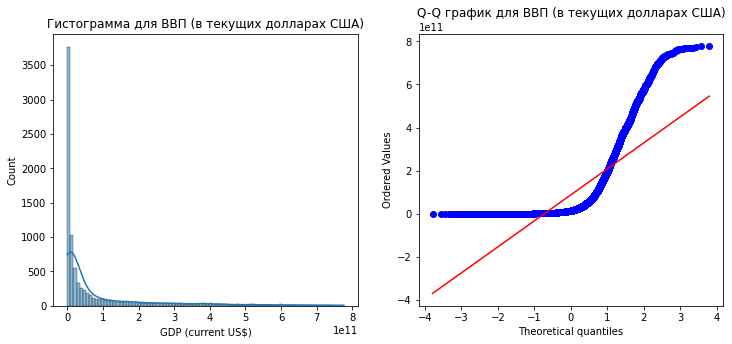

In [69]:
target = df_final_encoded['GDP (current US$)']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(target, kde=True)
plt.title('Гистограмма для ВВП (в текущих долларах США)')

plt.subplot(1, 2, 2)
stats.probplot(target, dist="norm", plot=plt)
plt.title('Q-Q график для ВВП (в текущих долларах США)')

plt.show()

2) Оценка центрального положения <br>

In [71]:
mean_gdp = np.mean(target)
median_gdp = np.median(target)

print(f"Среднее ВВП: {mean_gdp/1e9} млрд. $")
print(f"Медиана ВВП: {median_gdp/1e9} млрд. $")

Среднее ВВП: 87.92805684981253 млрд. $
Медиана ВВП: 14.3869082568601 млрд. $


3) Оценка разброса <br>

In [76]:
variance_gdp = np.var(target, ddof=1)
std_dev_gdp = np.std(target, ddof=1)

print(f"Дисперсия ВВП: {variance_gdp}")
print(f"Стандартное отклонение ВВП: {std_dev_gdp/1e9} млрд. $")


Дисперсия ВВП: 2.316264808581175e+22
Стандартное отклонение ВВП: 152.1927990603095 млрд. $


4) Проверка на нормальность с помощью теста Шапиро-Уилка  + Интерпретация теста Шапиро-Уилка<br> 

In [72]:
shapiro_test = stats.shapiro(target)
print(f"Тест на нормальность Шапиро-Уилка: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

if shapiro_test.pvalue > 0.05:
    print("Распределение похоже на нормальное (не отвергаем гипотезу нормальности).")
else:
    print("Распределение отличается от нормального (отвергаем гипотезу нормальности).")


Тест на нормальность Шапиро-Уилка: W=0.6299207520753382, p-value=4.5762215528338864e-88
Распределение отличается от нормального (отвергаем гипотезу нормальности).


C:\Users\user\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9100.
  res = hypotest_fun_out(*samples, **kwds)


Выводы: 2 теста (Q-Q и Шапиро-Уилк) подтвердили, что распределение не является нормальным, имеется значительная ассиметрия данных. Стандартное отклонение значений ВВП в датасете - 152 млрд долларов, несмотря на удаление аутлаеров. Медиана ВВП - 14 млрд. долларов, хотя среднее значение - 87.92 млрд долларов, что говорит о правосторонней ассиметрии. Предпочтительно использовать модели, устойчивые к выбросам и ассиметрии. 

## Исследуем мультиколлинеарность 
1) корреляция между колоннами. Чтобы визуально не перегрузить график, выведем именно корреляцию >0.8 

In [17]:
correlation_matrix = df_final_encoded.drop(columns=['GDP (current US$)']).corr()

In [18]:
threshold = 0.8

high_correlation_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1)]

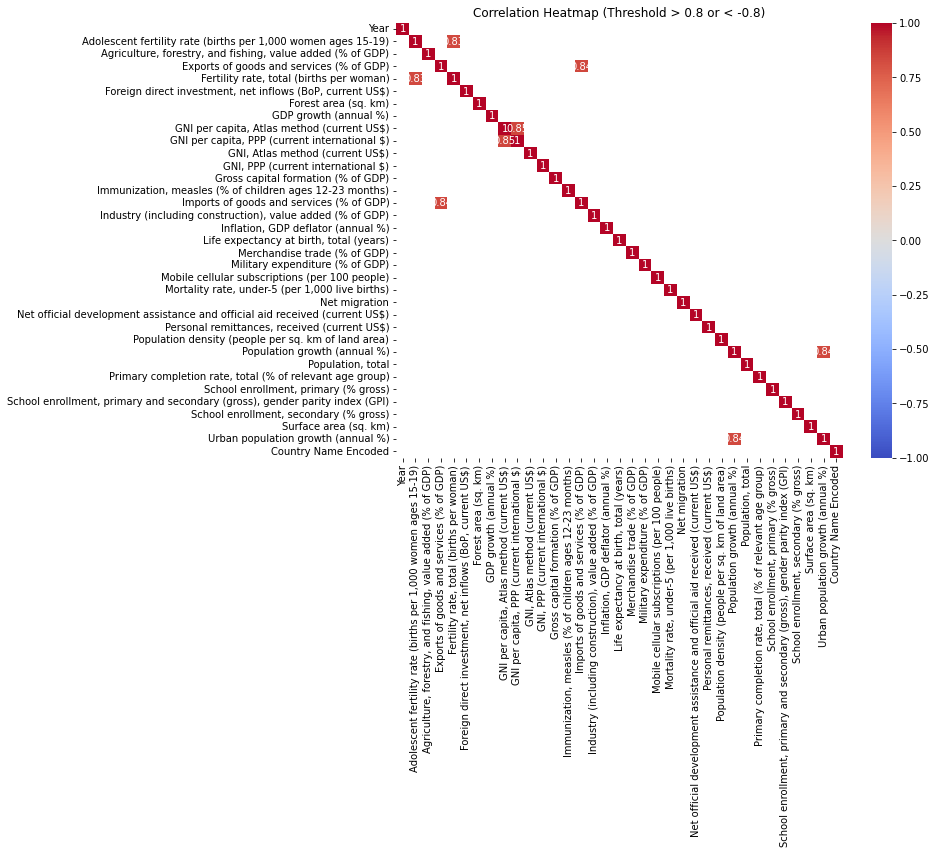

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

mask = correlation_matrix.abs() < threshold

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Threshold > 0.8 or < -0.8)")
plt.show()


Поскольку корреляция в целом препядствует только линейной регрессии и отображает лишь линейную зависимость, нужно посмотреть и на другую метрику, чтобы запечатлеть более комплексные зависимости. <br>
2 метод - Variance Inflation Factor (фактор инфляции дисперсии)

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df_final_encoded.drop(columns=['GDP (current US$)'])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by='VIF', ascending=False))


                                              feature       VIF
4            Fertility rate, total (births per woman)  7.135213
3            Exports of goods and services (% of GDP)  5.884255
9       GNI per capita, PPP (current international $)  5.395726
14           Imports of goods and services (% of GDP)  5.291514
32                              Surface area (sq. km)  4.968978
10                    GNI, Atlas method (current US$)  4.890620
8          GNI per capita, Atlas method (current US$)  4.859722
33                 Urban population growth (annual %)  4.543024
21    Mortality rate, under-5 (per 1,000 live births)  4.349337
34                               Country Name Encoded  4.152694
1   Adolescent fertility rate (births per 1,000 wo...  4.049241
26                       Population growth (annual %)  3.953774
27                                  Population, total  3.828016
31             School enrollment, secondary (% gross)  3.583352
11                 GNI, PPP (current int

Можем видеть, что GNI как в мультиколлинеарности, так и в VIF показывают высокую мультиколлинеарность. Высокая зависимость у колонны "страна" вызвана target encoding-ом. Остальные колонны, имеющие VIF>=5 или корреляцию >0.8 говорят о высокой мультиколлинеарности и одна из двух зависимых колонн подлежит удалнию. Удалим Fertility rate, GNI per capita, PPP, Surface area (VIF~5) и Imports of goods and services (% of GDP) .

In [21]:
columns_to_delete = ['Fertility rate, total (births per woman)', 'Surface area (sq. km)', 'GNI per capita, PPP (current international $)', 'Imports of goods and services (% of GDP)']
df_no_multicol = df_final_encoded.drop(columns = columns_to_delete)

In [22]:
X = df_no_multicol.drop(columns=['GDP (current US$)'])

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data.sort_values(by='VIF', ascending=False))

                                              feature       VIF
8                     GNI, Atlas method (current US$)  4.769784
29                 Urban population growth (annual %)  4.462488
30                               Country Name Encoded  3.833932
18    Mortality rate, under-5 (per 1,000 live births)  3.779210
23                       Population growth (annual %)  3.676670
28             School enrollment, secondary (% gross)  3.525807
1   Adolescent fertility rate (births per 1,000 wo...  3.306019
9                  GNI, PPP (current international $)  3.233458
14            Life expectancy at birth, total (years)  2.976655
20  Net official development assistance and offici...  2.934170
24                                  Population, total  2.581897
5                                Forest area (sq. km)  2.401518
3            Exports of goods and services (% of GDP)  2.325269
21       Personal remittances, received (current US$)  2.216412
7          GNI per capita, Atlas method 

Колонны с высокой мультиколлинеарностью были удалены для предотвращения перетренировки, не осталось колонн с VIF>5. 

## Проведём нормализацию данных  используя Min-Max scaler
(поскольку раннее тесты подтвердили, что распределение не является нормальным, стандартизация неприменима) 

In [23]:
from sklearn.preprocessing import MinMaxScaler

X = df_no_multicol.drop(columns=['GDP (current US$)']) 
y = df_no_multicol['GDP (current US$)']  

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

df_final_scaled = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)

df_final_scaled.head()


,Year,"Adolescent fertility rate (births per 1,000 women ages 15-19)","Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),"Foreign direct investment, net inflows (BoP, current US$)",Forest area (sq. km),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)","GNI, PPP (current international $)",...,Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Primary completion rate, total (% of relevant age group)","School enrollment, primary (% gross)","School enrollment, primary and secondary (gross), gender parity index (GPI)","School enrollment, secondary (% gross)",Urban population growth (annual %),Country Name Encoded,GDP (current US$)
0,0.603448,0.612139,0.000000,0.0,0.488504,0.001383,0.294416,0.000000,0.000000,0.004811,...,0.001388,0.619464,0.006658,0.0,0.103242,0.000000,0.000000,0.502441,0.017916,3.521418e+09
1,0.620690,0.605282,0.000000,0.0,0.488504,0.001383,0.251058,0.000000,0.000000,0.004617,...,0.001398,0.604570,0.006707,0.0,0.106715,0.000000,0.074419,0.490418,0.017916,2.813572e+09
2,0.637931,0.594361,0.488699,0.0,0.488571,0.001383,0.425886,0.001337,0.002865,0.006103,...,0.001491,0.725778,0.007154,0.0,0.353842,0.000000,0.000000,0.587436,0.017916,3.825701e+09
3,0.655172,0.575219,0.473403,0.0,0.488582,0.001383,0.335016,0.001411,0.003218,0.006756,...,0.001608,0.748965,0.007715,0.0,0.449775,0.375536,0.072396,0.605957,0.017916,4.520947e+09
4,0.672414,0.556992,0.376014,0.0,0.488757,0.001383,0.300916,0.001560,0.003714,0.007031,...,0.001672,0.672337,0.008025,0.0,0.494955,0.280013,0.099060,0.548782,0.017916,5.224897e+09


## Посмотрим на приоритетность каждого из параметров / переменных  (feature selection) используя random forest regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = df_final_scaled.drop(columns=['GDP (current US$)']) 

y = df_final_scaled['GDP (current US$)']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

top_n = 15
top_features = feature_importance_df['Feature'][:top_n]

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

y_pred_selected = rf_selected.predict(X_test_selected)

mse_selected = mean_squared_error(y_test, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)

print(f'RMSE with top {top_n} features: {rmse_selected}')


                                              Feature  Importance
8                     GNI, Atlas method (current US$)    0.872964
30                               Country Name Encoded    0.073096
20  Net official development assistance and offici...    0.024216
24                                  Population, total    0.007038
7          GNI per capita, Atlas method (current US$)    0.005330
4   Foreign direct investment, net inflows (BoP, c...    0.001723
15                       Merchandise trade (% of GDP)    0.001709
21       Personal remittances, received (current US$)    0.001535
14            Life expectancy at birth, total (years)    0.001029
13                 Inflation, GDP deflator (annual %)    0.000907
9                  GNI, PPP (current international $)    0.000878
6                               GDP growth (annual %)    0.000704
1   Adolescent fertility rate (births per 1,000 wo...    0.000641
25  Primary completion rate, total (% of relevant ...    0.000632
5         

## Деление на тренировочные и валидационные (тестовые) данные

In [27]:
from sklearn.model_selection import train_test_split

X = df_final_scaled.drop(columns=['GDP (current US$)'])  
y = df_final_scaled['GDP (current US$)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##  Тренировка моделей
Были выбранны следующие модели: 
1) Линейная регрессия
2) Случайный лес 
3) XGBoost
4) 

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_reg = LinearRegression()

linear_reg.fit(X_train, y_train)

y_pred_lr = linear_reg.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression with All Features")
print(f"R²: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr / 1e9:.2f} billion")

linear_reg.fit(X_train_selected, y_train)

y_pred_lr_selected = linear_reg.predict(X_test_selected)

r2_lr_selected = r2_score(y_test, y_pred_lr_selected)
rmse_lr_selected = np.sqrt(mean_squared_error(y_test, y_pred_lr_selected))

print("\nLinear Regression with Selected Features")
print(f"R²: {r2_lr_selected:.4f}")
print(f"RMSE: {rmse_lr_selected / 1e9:.2f} billion")

Linear Regression with All Features
R²: 0.9409
RMSE: 36.34 billion

Linear Regression with Selected Features
R²: 0.9380
RMSE: 37.24 billion


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest with All Features")
print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf / 1e9:.2f} billion")

rf_model.fit(X_train_selected, y_train)

y_pred_rf_selected = rf_model.predict(X_test_selected)

r2_rf_selected = r2_score(y_test, y_pred_rf_selected)
rmse_rf_selected = np.sqrt(mean_squared_error(y_test, y_pred_rf_selected))

print("\nRandom Forest with Selected Features")
print(f"R²: {r2_rf_selected:.4f}")
print(f"RMSE: {rmse_rf_selected / 1e9:.2f} billion")


Random Forest with All Features
R²: 0.9882
RMSE: 16.24 billion

Random Forest with Selected Features
R²: 0.9879
RMSE: 16.44 billion


In [54]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

xgb_model_all = xgb.XGBRegressor()
xgb_model_all.fit(X_train, y_train)

y_pred_xgb_all = xgb_model_all.predict(X_test)

r2_xgb_all = r2_score(y_test, y_pred_xgb_all)
rmse_xgb_all = np.sqrt(mean_squared_error(y_test, y_pred_xgb_all))

print(f"XGBoost - All Features - R²: {r2_xgb_all:.4f}")
print(f"XGBoost - All Features - RMSE: {rmse_xgb_all / 1e9:.2f} billion")

xgb_model_selected = xgb.XGBRegressor()
xgb_model_selected.fit(X_train_selected, y_train)

y_pred_xgb_selected = xgb_model_selected.predict(X_test_selected)

r2_xgb_selected = r2_score(y_test, y_pred_xgb_selected)
rmse_xgb_selected = np.sqrt(mean_squared_error(y_test, y_pred_xgb_selected))

print(f"XGBoost - Selected Features - R²: {r2_xgb_selected:.4f}")
print(f"XGBoost - Selected Features - RMSE: {rmse_xgb_selected / 1e9:.2f} billion")


XGBoost - All Features - R²: 0.9883
XGBoost - All Features - RMSE: 16.15 billion
XGBoost - Selected Features - R²: 0.9887
XGBoost - Selected Features - RMSE: 15.91 billion


In [55]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

knn_model_all = KNeighborsRegressor()
knn_model_all.fit(X_train, y_train)

y_pred_knn_all = knn_model_all.predict(X_test)

r2_knn_all = r2_score(y_test, y_pred_knn_all)
rmse_knn_all = np.sqrt(mean_squared_error(y_test, y_pred_knn_all))

print(f"KNN - All Features - R²: {r2_knn_all:.4f}")
print(f"KNN - All Features - RMSE: {rmse_knn_all / 1e9:.2f} billion")

knn_model_selected = KNeighborsRegressor()
knn_model_selected.fit(X_train_selected, y_train)

y_pred_knn_selected = knn_model_selected.predict(X_test_selected)

r2_knn_selected = r2_score(y_test, y_pred_knn_selected)
rmse_knn_selected = np.sqrt(mean_squared_error(y_test, y_pred_knn_selected))

print(f"KNN - Selected Features - R²: {r2_knn_selected:.4f}")
print(f"KNN - Selected Features - RMSE: {rmse_knn_selected / 1e9:.2f} billion")


KNN - All Features - R²: 0.9513
KNN - All Features - RMSE: 33.00 billion
KNN - Selected Features - R²: 0.9685
KNN - Selected Features - RMSE: 26.53 billion


C:\Users\user\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


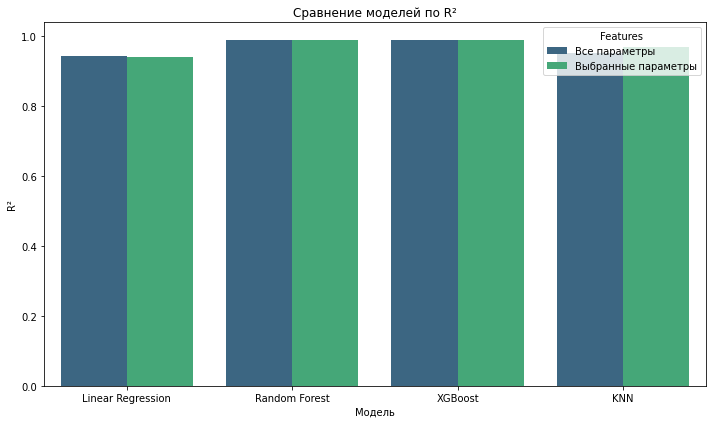

C:\Users\user\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\user\anaconda3\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


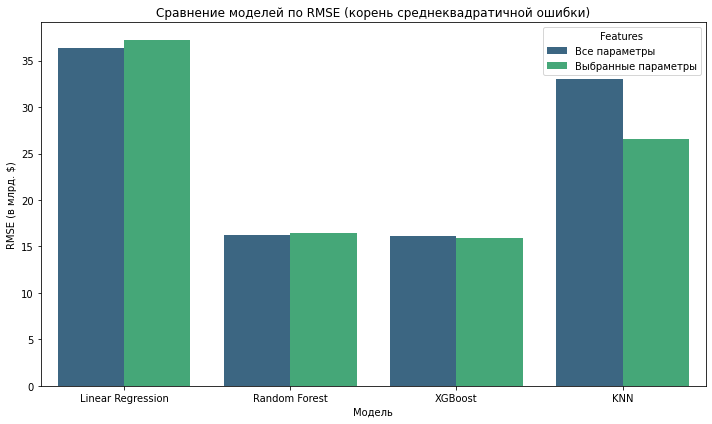

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = {
    "Model": [
        "Linear Regression", "Linear Regression", 
        "Random Forest", "Random Forest", 
        "XGBoost", "XGBoost", 
        "KNN", "KNN"
    ],
    "Features": [
        "Все параметры", "Выбранные параметры",
        "Все параметры", "Выбранные параметры", 
        "Все параметры", "Выбранные параметры", 
        "Все параметры", "Выбранные параметры"
    ],
    "R²": [
        r2_lr, r2_lr_selected, 
        r2_rf, r2_rf_selected, 
        r2_xgb_all, r2_xgb_selected, 
        r2_knn_all, r2_knn_selected
    ],
    "RMSE (billion)": [
        rmse_lr / 1e9, rmse_lr_selected / 1e9,
        rmse_rf / 1e9, rmse_rf_selected / 1e9,
        rmse_xgb_all / 1e9, rmse_xgb_selected / 1e9,
        rmse_knn_all / 1e9, rmse_knn_selected / 1e9
    ]
}

results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="R²", hue="Features", palette="viridis")
plt.title('Сравнение моделей по R²')
plt.ylabel('R²')
plt.xlabel('Модель')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x="Model", y="RMSE (billion)", hue="Features", palette="viridis")
plt.title('Сравнение моделей по RMSE (корень среднеквадратичной ошибки)')
plt.ylabel('RMSE (в млрд. $)')
plt.xlabel('Модель')
plt.tight_layout()
plt.show()


Вывод: <br>
Все модели имеют высокий r2 (>0.9) <br> 
Наименьший корень среднеквадратичной ошибки - 15.91 миллиардов долларов <br> 
Лучшая модель: XGBoost, на выбранных 15 параметрах <br> 


## Настройка гиперпараметров
Теперь, можем настроить лучшую модель, используя разные гиперпараметры, используя random search (случайный поиск)

In [89]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [100, 200, 500],     
    'max_depth': [3, 6, 10],              
    'min_child_weight': [1, 5],           
    'subsample': [0.7, 0.8, 1.0],         
    'colsample_bytree': [0.7, 0.8, 1.0],  
    'gamma': [0, 0.1, 0.2],              
    'reg_alpha': [0, 0.1],                
    'reg_lambda': [1, 1.5, 2],            
}

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train_selected, y_train)

best_params = random_search.best_params_

best_xgb_model = random_search.best_estimator_

y_pred_xgb = best_xgb_model.predict(X_test_selected)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"Лучшие параметры: {best_params}")
print(f"XGBoost (Лучшая модель) - R²: {r2_xgb:.4f}")
print(f"XGBoost (Лучшая модель) - RMSE: {rmse_xgb / 1e9:.2f} миллиардов")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры: {'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}
XGBoost (Лучшая модель) - R²: 0.9905
XGBoost (Лучшая модель) - RMSE: 14.54 миллиардов
